# Project Title: Analyzing and Forecasting Household Energy Consumption Patterns in Africa

**Sector:** Energy

**Dataset Source:** https://data.worldbank.org/indicator/EG.USE.PCAP.KG.OE

**Student:** UMUTONI GLORIA

**ID:** 26039


## Part 1: Data Cleaning
Load and clean the dataset from World Bank. Focus on African countries and years 2000-2021.

In [ ]:
%pip install pandas numpy matplotlib seaborn scikit-learn

In [ ]:
# -------------------------------
# ✅ PART 2: PYTHON ANALYTICS
# Analyzing and Forecasting Household Energy Consumption in Africa
# -------------------------------

# 📌 1. IMPORT LIBRARIES
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import warnings
warnings.filterwarnings("ignore")

# 📌 2. LOAD & TRANSFORM DATA

# Load the dataset (replace with actual file name from zip)
df_raw = pd.read_csv("API_EG.USE.PCAP.KG.OE_DS2_en_csv_v2_22839.csv", skiprows=4)

# Keep only relevant columns
columns_to_keep = ['Country Name', 'Country Code'] + [str(year) for year in range(2000, 2023)]
df = df_raw[columns_to_keep]

# Melt the data from wide to long format
df = df.melt(id_vars=['Country Name', 'Country Code'], var_name='Year', value_name='EnergyUse')

# Drop missing values
df = df.dropna(subset=['EnergyUse'])

# Rename columns
df.rename(columns={'Country Name': 'Country'}, inplace=True)

# Convert year to int
df['Year'] = df['Year'].astype(int)

#  CHECK FOR DUPLICATES OR OUTLIERS
print("\nChecking duplicates:", df.duplicated().sum())

# Remove duplicates if any
df = df.drop_duplicates()

# Preview
print(df.head())


## Part 2: Exploratory Data Analysis (EDA)
Visualize energy consumption trends over time for selected countries.

In [ ]:

# a. Line chart: Energy use over years for a few countries
sample_countries = ['Rwanda', 'Kenya', 'Nigeria', 'South Africa', 'Egypt']
df_sample = df[df['Country'].isin(sample_countries)]

plt.figure(figsize=(12,6))
sns.lineplot(data=df_sample, x='Year', y='EnergyUse', hue='Country')
plt.title('Energy Use Over Time (Selected African Countries)')
plt.xlabel('Year')
plt.ylabel('Energy Use (kg per capita)')
plt.grid(True)
plt.show()

# b. Average energy use per country
avg_use = df.groupby('Country')['EnergyUse'].mean().sort_values(ascending=False).head(10)
print("\nTop 10 Energy Consuming Countries (on average):")
print(avg_use)

## Part 3: Forecasting with Linear Regression (Example: Rwanda)
Use Linear Regression to forecast Rwanda's energy consumption trend.

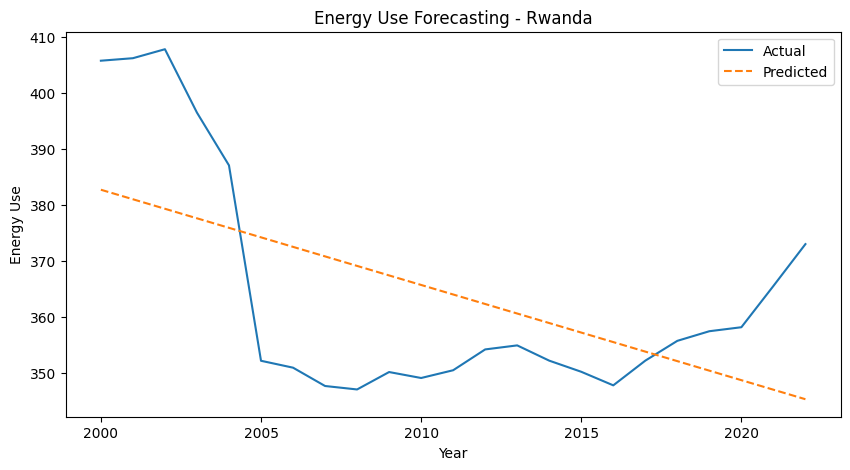

In [6]:

# Filter Rwanda data
rwanda_data = df[df['Country'] == 'Rwanda'][['Year', 'EnergyUse']]
rwanda_data = rwanda_data.sort_values('Year')

# Train/Test Split (Simple version)
X = rwanda_data[['Year']]
y = rwanda_data['EnergyUse']

# Train model
model = LinearRegression()
model.fit(X, y)
predictions = model.predict(X)

# 📊 Plot actual vs predicted
plt.figure(figsize=(10,5))
plt.plot(X, y, label='Actual')
plt.plot(X, predictions, label='Predicted', linestyle='--')
plt.title('Energy Use Forecasting - Rwanda')
plt.xlabel('Year')
plt.ylabel('Energy Use')
plt.legend()
plt.show()

## Part 4: Evaluate Model ( Model Evaluation for rwanda)
Use metrics such as:
RMSE (Root Mean Squared Error): How far your predictions are from actual values (lower is better)
R² Score: Measures how well your model fits the data (closer to 1 = better)

In [ ]:

#  EVALUATE MODEL
from sklearn.metrics import mean_squared_error, r2_score
from math import sqrt

r2 = r2_score(y, predictions)             # R-squared
mse = mean_squared_error(y, predictions)  # Mean Squared Error
rmse = sqrt(mse)                          # Root Mean Squared Error

# Show the results
print("\n📊 Model Evaluation for Rwanda")
print(f"R² Score: {r2:.2f}")
print(f"RMSE: {rmse:.2f}")

## Part 5: INNOVATION 
Adding a custom function to forecast next year’s usage


In [ ]:


# Custom function to forecast next year
def forecast_next_year(country):
    country_df = df[df['Country'] == country][['Year', 'EnergyUse']]
    if country_df.shape[0] < 5:
        return f"Not enough data for {country}"
    
    X = country_df[['Year']]
    y = country_df['EnergyUse']
    model = LinearRegression()
    model.fit(X, y)
    
    next_year = X['Year'].max() + 1
    prediction = model.predict([[next_year]])
    
    return f"{country} predicted energy use for {next_year}: {prediction[0]:.2f} kg/capita"

# Try it
print(forecast_next_year("Rwanda"))

## Part 4: Export Cleaned Data
Save the cleaned dataset for use in Power BI visualization.

In [11]:
df.to_csv('cleaned_energy_data.csv', index=False)